## Missing Values-Feature Engineering-Day-1



Lifecycle of DS Projects -

1. Data Collecttion Strategy - from compnay side, 3rd Party API's, Online and offline Surveys.
2. Feature Engineering - Handling Missing Values

Why are their Missing Values? e.g Depression Survey
1. Emp hesitate to put down the information.
2. Survey informations are not that valid.
3. Men -not disclose Salary
4. Women - not disclose Age
5. There will no data for those died--NAN

DS PRojects -- Dataset should be collected from multiple sources.

#### What ate the different types of Missing Data?

##### 1. Missing Completely at Random, MCAR:
A variable is missing comoletely at random (MCAR), if the probability of being missing is the same for all the obs. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed no relationship between the data missing and any other values, observed or missing , within dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes data more likely to be missing than other.







In [1]:
import pandas as pd
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


#### 2. Missing Data Not At Random(MNAR): Systematic Missing Values

There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.



In [4]:
import numpy as np
df['cabin_null'] = np.where(df['Cabin'].isnull(),1,0)


In [5]:
## Find the percentage of null values
df['cabin_null'].mean()

0.7710437710437711

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [8]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

### Missing At Random(MAR)



Men --> Hide their salary
Women --> Hide their age

### All the techniques of handling, issuing values.

1. Mean/Median/Mode replacement.
2. Random Sample Imputation.
3. Capturing NAN values with a new feature.
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation




### Mean/Median/Mode Imputation



When should we apply?

This imputation has the assumption that the data are missing completely ar random(MCAR). We solve this by replacing the NAN with the most frequent occurence of the variables.



In [9]:
df = pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [10]:
## Let's go and see the percentage of missing values
df.isnull().mean()


Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [11]:
def impute_nan(df, variable, median):
    df[variable+"_median"] = df[variable].fillna(median)    


In [13]:
median = df.Age.median()
median

28.0

In [14]:
impute_nan(df, "Age", median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [15]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

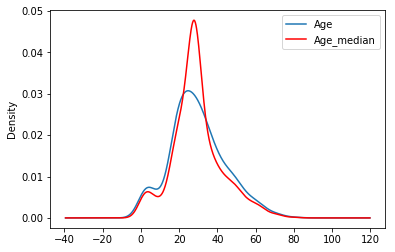

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advtages 
1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete dataset

### Disadvts
1. Change or Distortion in the original variance
2. Impacts on Correlation.




### Random Sample Imputation

Aim: Random Sample Imputaion consists of taking random observation from the dataset and we use this observation to replace the NAN values.

When should it be used?
It assumes that the data are missing completely at random(MCAR).


In [19]:
import pandas as pd
df = pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [20]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [21]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [22]:
df['Age'].isnull().sum()

177

In [23]:
df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
595    36.00
637    31.00
54     65.00
456    65.00
110    47.00
287    22.00
315    26.00
691     4.00
811    39.00
861    21.00
15     55.00
239    33.00
644     0.75
394    24.00
795    39.00
131    20.00
346    40.00
9      14.00
477    29.00
606    30.00
469     0.75
325    36.00
72     21.00
724    27.00
40     40.00
       ...  
396    31.00
452    30.00
395    22.00
882    22.00
821    27.00
314    43.00
622    20.00
204    18.00
60     22.00
731    11.00
81     29.00
676    24.50
433    17.00
378    20.00
174    56.00
624    21.00
642     2.00
157    30.00
427    19.00
698    49.00
179    36.00
24      8.00
630    80.00
458    50.00
49     18.00
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [24]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [31]:
def impute_nan(df, variable, median):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+'_random'] = df[variable]
    ##It will have the random sample to fill the an values
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    ##Pandas need to have same index in order to merge the dataset.
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] =  random_sample
    

In [26]:
median = df.Age.median()

In [27]:
median

28.0

In [32]:
impute_nan(df, "Age", median)

In [33]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


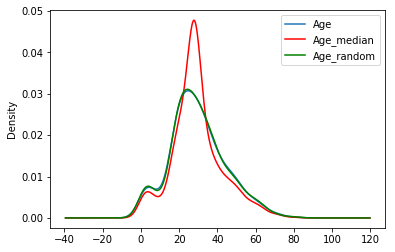

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advts -
1. Easy to implement.
2. There is less distortion in variance.

### Disadvts -
1. It works well if the data are not missing completely at random.




In [36]:
## Capturing NAN values with a new feature
## It works well if the data are not missing completely at random. 

df = pd.read_csv('titanic.csv', usecols =['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [37]:
df['Age_NAN'] = np.where(df['Age'].isnull(),1,0)

In [38]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [39]:
df.Age.median()

28.0

In [41]:
df['Age'].fillna(df.Age.median(), inplace=True)
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


### Advts -
1. Easy to implement
2. Captures the imporatance of missing values.

### Disadvts -
1. Creating Additional Features(Curse of Dimensionality)



### End of Distribution Imputation

In [42]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


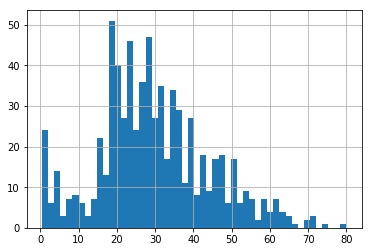

In [43]:
df.Age.hist(bins=50)

In [44]:
extreme = df.Age.mean()+3*df.Age.std()

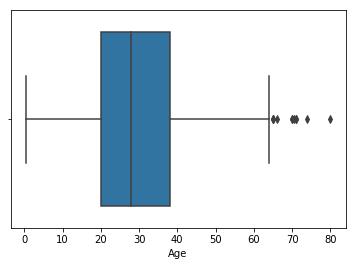

In [45]:
import seaborn as sns
sns.boxplot('Age', data=df)

In [46]:
def impute_nan(df, variable, median, extreme):
    df[variable+"_end_distribution"] = df[variable].fillna(extreme)
    df[variable].fillna(median, inplace=True)    

In [47]:
impute_nan(df, 'Age',df.Age.median(), extreme)

In [48]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


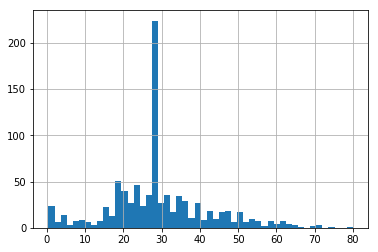

In [49]:
df['Age'].hist(bins=50)

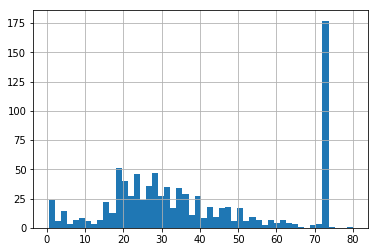

In [50]:
df['Age_end_distribution'].hist(bins=50)

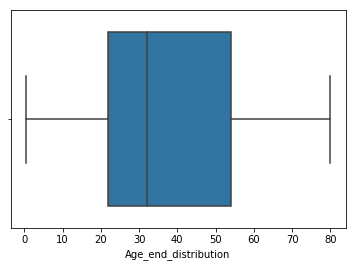

In [51]:
sns.boxplot('Age_end_distribution', data=df)

### Arbitrary Value Imputation

This technique was derived from Kaggle compitition. It consists of replacing NAN by an arbitrary value.



In [52]:
df=pd.read_csv("titanic.csv", usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [53]:
def impute_nan(df, variable):
    df[variable+'_zero'] = df[variable].fillna(0)
    df[variable+'_hundered'] = df[variable].fillna(100)

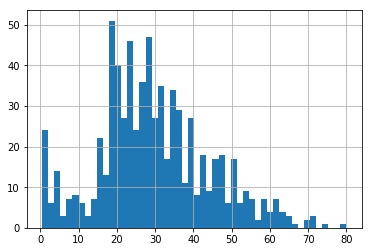

In [54]:
df['Age'].hist(bins=50)

### Advts -
1. Easy to implement.
2. Captures the imporatnce of missingness, if there is one.

### Disadvts -
1. Distorts the original distribution of the variable.
2. If the missingness is not important, it may mask the predictive power of the original variable by distorting its distribution.
3. Hard to decide which value to use.






### How to Handle Categorical Missing Values

### Frequent Category Imputation -->



In [1]:
# df=pd.read_csv('loan.csv')

In [ ]:
df.head()

## Handling Categorical Features

### One Hot Encoding

In [3]:
import pandas as pd

df = pd.read_csv('titanic.csv', usecols=['Sex'])
df.head()


,Sex
0,male
1,female
2,female
3,female
4,male


In [4]:
pd.get_dummies(df, drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [5]:
df = pd.read_csv('titanic.csv', usecols=['Embarked'])

In [6]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [7]:
df.dropna(inplace=True)

In [8]:
pd.get_dummies(df, drop_first=True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [9]:
## One Hot Encoding with many categories  in a features
df = pd.read_csv('mercedes.csv', usecols=["X0","X1","X2","X3","X4","X5","X6"])
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [10]:
for i in df.columns:
    print(len(df[i].unique()))

47
27
44
7
4
29
12


In [12]:
df.X1.value_counts().sort_values(ascending=False).head(10)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

In [ ]:
lst_10 = df.X1.value_counts().sort_values(ascending=False).head(10).index
